<a href="https://colab.research.google.com/github/FelipePRosa/Data-Science-Projects/blob/main/An%C3%A1lise_de_Risco_de_Inadimpl%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito
<left><img alt="Analisando Airbnb" width="30%" src="https://image.freepik.com/fotos-gratis/cartoes-de-credito-empilhados-ordenadamente_1150-16385.jpg"></left>

*by [Felipe Rosa](https://www.linkedin.com/in/felipe-pimentel-rosa-19975b10b/)*<br>
*Blog: [Medium](https://medium.com/@felipepimentelrosa)*

---
<br>

A taxa de inadiplência da carteira de clientes de bancos, financiadores e empresãrios é uma das áreas que mais causam problemas.

A idéia de analisar um possível descomprimento das obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*. 

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="https://image.freepik.com/fotos-gratis/mulher-segurando-cartao-de-credito-na-mao-e-inserindo-codigo-de-seguranca-usando-laptop_1253-1556.jpg" height="300px">
</p>
 
Pesquisa inédita realizada pela CNDL e SPC Brasil buscou avaliar o perfil dos brasileiros adimplentes e inadimplentes.

Para o perfil adimplente, foram ouvidos em todo o país 668 pessoas, de acordo com a distribuição do IBGE por estado da Federação; nenhuma delas possuía conta em atraso há mais de 90 dias. Já para o perfil inadimplente, foram 609 casos, todos eles de pessoas com alguma conta em atraso há mais de 90 dias.

A pesquisa dos inadimplentes tem margem de erro de 4,0% a um intervalo de confiança de 95%. A pesquisa dos adimplentes tem margem de erro de 3,8% a um intervalo de confiança de 95%.

Os pontos mais relevantes na pesquisa são:
* 49% dos adimplentes possuem contas parceladas no cartão de crédito;
* 38% dos inadimplentes possuem contas em atraso de compras parceladas no cartão
de crédito; sendo que destes, 82% afirmam que essas contas estão há mais de 90 dias atrasadas;
* 29% dos adimplentes possuem apenas um cartão de crédito, 21% possuem 2 cartões e 7% possuem 3 cartões de crédito;
* 27% dos inadimplentes possuem apenas um cartão de crédito, 16% possuem 2 cartões e 5% possuem 3 cartões de crédito;
* 93% dos adimplentes pagam o valor total das faturas na data de vencimento. Para os inadimplentes, esse percentual cai para 60%;
* 85% dos inadimplentes desconhecem a taxa de juros mensal quando não é feito o
pagamento do valor total da fatura;
* 31% dos adimplentes pretendem realizar compras parceladas no cartão de crédito nos próximos seis meses, enquanto 22% dos inadimplentes pretendem realizar tal tipo de compra.

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.


## Contextualização do Problema

O objetivo é prever qual a probabilidade de um cliente de uma FinTech não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).


> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras da FinTech, porém minimizando também os falsos positivos.

## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [1]:
import time
start_time = time.time()
!pip install https://github.com/matplotlib/basemap/archive/master.zip -q

     / 149.4MB 1.3MB/s
     |████████████████████████████████| 6.5MB 19.4MB/s 
     |████████████████████████████████| 225kB 46.0MB/s 


In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import plotly.express as px
from sklearn.utils import resample
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix
import numpy as np

# definir o estilo do seaborn para os plots
sns.set_style()

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

## Análise Exploratória de Dados

A primeira coisa que faremos após importar o *dataset* será examinar as dimensões do *DataFrame* e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso *dataset* é composto por 45 mil entradas e 43 colunas.

In [4]:
# Quantidade de dados
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Linhas:		45000
Colunas:	43


Já as primeiras 5 entradas desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [5]:
# ver as 5 primeiras entradas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN



Algumas conclusões iniciais que podem ser destacadas a respeito desse análise inicial:

* Existe uma coluna `id`, anônima, que representa um identificador único do cliente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante.
* A coluna profile_tags contém tags atribuídas a cada solicitante no formato `'tags': ['n19', 'n8']`
* A variável alvo para analisar o risco de *default* (inadimplência) está na coluna `target_default`.
* As colunas `['score_3', 'score_4', 'score_5']` são numéricas e as colunas `['score_1', 'score_2']` estão codificadas de alguma maneira. Teremos que verificar a frente se existe uma quantidade de classes que possa ser convertida em informação útil.
* existem outras variáveis que apresentam algum tipo de codificação, como `['reason', 'state', 'zip', 'channel', 'job_name', 'real_state']` que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.
* A coluna `profile_tags` contém um dicionário com *tags* atribuídas a cada cliente, aparentemente.
* A coluna `target_fraud` seria a variável alvo de outro modelo para este mesmo *dataset*, onde o objetivo seria a detecção de fraude.
* A coluna `lat_lon` está em formato *string* contendo uma tupla com as coordenadas.

In [6]:
# ver resumo estatístico do dados numéricos
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [7]:
df.describe(include='O')

,ids,target_default,score_1,score_2,reason,facebook_profile,state,zip,channel,job_name,real_state,application_time_applied,email,external_data_provider_first_name,lat_lon,marketing_channel,profile_phone_number,shipping_state,profile_tags,user_agent,target_fraud
count,45000,41741,44438,44438,44434,40542,44438,44438,44438,41664,44438,45000,45000,45000,43637,41422,45000,45000,45000,44278,1522
unique,45000,2,7,35,14874,2,50,823,1,32265,5,35543,6,32886,22412,9,45000,25,26131,297,2
top,f99d3d7e-76f1-bffc-18e6-c3be13d00bbc,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,False,xsd3ZdsI3356I3xMxZeiqQ==,3k2JCQ8Bp5oDwaI39ZJgHA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,18:02:09,gmail.com,claudinei,"(-5.164423488858103, -37.356920426246845)",Website,738-1149468,BR-SP,{'tags': ['aty']},Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,fraud_friends_family
freq,1,35080,14523,3573,4463,24933,7429,566,44438,167,22353,6,22720,7,18,10950,1,6994,358,195,904


Olhando o resumo das principais informações estatísticas somos capazes de destacar algumas observações:

* A coluna `external_data_provider_credit_checks_last_2_year` possui valores mínimos, máximos e desvio-padrão iguais a zero.
* A coluna `reported_income` apresenta valores *inf*, que irão interferir na análise e modelo. Substituiremos valores do tipo `np.inf` por `np.nan` para trabalhar com os dados.
* A coluna `external_data_provider_email_seen_before` apresenta o valor mínimo de -999, o que é estranho ao se considerar as outras informações. Após verificar de maneira mais aprofundada, chegou-se a conclusão que esse dados são *outliers* ou foram tratados inadequadamente. Substituiremos os valores inferiores a 0 por `np.nan`.

Vamos realizar o levantamento dos tipos de variáveis que compõem o *DataFrame* a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [8]:
print('Valore inf em reported_income: {}'.format(len(df[df['reported_income'] == np.inf])))
print('Valore negativos em external_data_provider_email_seen_before: {}'.format(len(df[df['external_data_provider_email_seen_before'] < 0])))

Valore inf em reported_income: 67
Valore negativos em external_data_provider_email_seen_before: 1293


Analisando a variável `reported_income` podemos perceber que existem muitos valores negativos e infinitos, teremos que analisar mais cuidadosamente para decidir o que fazer com essa variável.

In [9]:
# tipo das variáveis
print(df.dtypes)

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Outra análise importante para se fazer é identificar a quantidade de dados ausentes por *feature*.

In [10]:
# valores ausentes
print((df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

Em relação à porcentagem de valores ausentes identificados neste *dataset*:

* Diversas variáveis como `['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year']` possuem mais da metade dos valores ausentes.

* As variáves `['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues']` possuem entre 25-34% do seus valores ausentes.

* A variável alvo `target_default` contém valores nulos que serão eliminados do *dataset*.

Neste projeto, o caso mais extremo (`target_fraud`) não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. Já as demais *features* deverão ser usadas com o devido cuidado.

Uma outra análise interessante de se fazer diz respeito à contagem de valore únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma *feature*, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

In [11]:
# valores únicos
print(df.nunique().sort_values())

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

Com as análises acima podemos concluir que:

* A contagem de valores únicos mostra que as colunas `external_data_provider_credit_checks_last_2_year` e `channel` apresentam um único valor possível. Como não ha maiores informações sobre cada *feature* iremos descartar as duas colunas para o modelo de *Machine Learning*.

* Também se percebe que `profile_phone_number` possui 45 mil valores únicos, não trazendo provavelmente nenhuma informação que possa contribuir para a análise.

* A variável `shipping_zip_code` também aparenta não mostrar valores que irão impactar de forma positiva na análise, logo, será removido.]

* Apesar de `score_1` e `score_2` estarem codificados, pode-se perceber que são variáveis categóricas pela quantidade de dados repetidos, respectivamente 7 e 35. Então podem ser variáveis importantes a serem consideradas.

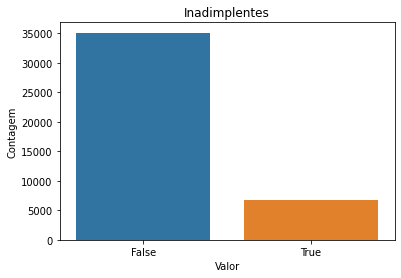

Proporção entre Inadimplentes no Dataset:
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [12]:
# Proporção entre Inadimplentes no Dataset
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()

print("Proporção entre Inadimplentes no Dataset:")
print(df['target_default'].value_counts() / df.shape[0])

Além dos dados analisados, fazendo uma contagem de valores de dados fraudados, vemos uma discrepância muito grande. Será de grande interesse balancear esses dados para resultar numa predição mais precisa.

Por enquanto, vamos dividir a coluna de latitude e longitude em duas colunas independentes

## Preparação dos Dados

De princípio podemos avaliar alguns dados que foram mal preenchidos

In [13]:
# Quantidade de emails unicos
df.email.unique()

array(['outlook.com', 'gmail.com', 'spgov.com', 'hotmail.com',
       'hotmaill.com', 'gmaill.com'], dtype=object)

Com as informaçoes que obtivemos da análise dos dados podemos tomar algumas rpevidências com relação aos dados

In [14]:
df_clean = df.copy()

# substituir inf por nan em reported_income 
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

# gerar as variáveis latitude e longitude independentes
df_clean['lat'] = df_clean['lat_lon'].str.strip('()').str.split(',').str[0].astype(float).round(4)
df_clean['lon'] = df_clean['lat_lon'].str.strip('()').str.split(',').str[1].astype(float).round(4)

# eliminar colunas sem informação aparente ou que demandam mais pesquisa
drop_var = ['ids', 'target_fraud', 'external_data_provider_credit_checks_last_2_year',
            'channel', 'reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'shipping_zip_code', 'user_agent', 'lat_lon', 'profile_phone_number','state']
df_clean.drop(labels=drop_var, axis=1, inplace=True)

df_clean = df_clean[df_clean['reported_income'] != np.inf]

# trocar string de facebook profile por inteiro
df_clean['facebook_profile'].fillna(value=False, inplace=True)
df_clean['facebook_profile'] = df_clean['facebook_profile'].map({False:'0', True:'1'}).astype(int)

#  substituir valores menores que 0 em external_data_provider_email_seen_before por NaN
df_clean.loc[df_clean['external_data_provider_email_seen_before'] < 0,
             'external_data_provider_email_seen_before'] = np.nan

# substituir emails escritos incorretamente
df_clean.email.replace('hotmaill.com', 'hotmail.com', inplace=True)
df_clean.email.replace('gmaill.com', 'gmail.com', inplace=True)

# pegar apenas estado de shipping_state
df_clean['shipping_state'] = df_clean['shipping_state'].str[-2:]

# limpar valores vazios de target_default e transformar em inteiro
df_clean.dropna(subset=['target_default'], inplace=True)
df_clean['target_default'] = df_clean['target_default'].map({True: 1, False: 0})

# separar as tags de profile_tags
df_clean['profile_tags'] = df_clean['profile_tags'].str.extract('\[(.*)\]')[0].str.replace("'","").str.replace(',','')

# Mudar formato para pegar apenas a hora
df_clean['application_time_applied'] = df_clean['application_time_applied'].str[:2].astype(int)
df_clean.loc[df_clean['application_time_applied'] == 24, 'application_time_applied'] = 0

# elminar as entradas onde target_default é NaN
df_clean.dropna(subset=['target_default'], inplace=True)
df_clean['last_amount_borrowed'].fillna(0.0, inplace=True)
df_clean['last_borrowed_in_months'].fillna(0.0, inplace=True)

Apesar de não haver maiores informações sobre as *features*, podemos assumir como premissa que muitos valores são nulos devido a dois fatores:

1. Há alguns itens que não são obrigatórios durante a etapa de preenchimento dos formulários, como a informação sobre o perfil do cliente no Facebook; e
2. Não existe observação alguma referente à coluna, como é caso das colunas `['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues']`.

De maneira geral, para as variáveis que se enquadram no segundo caso, os valores `NaN` serão substituidos por zero. Para as variáveis numéricas, será adotado o valor da mediana, e para as categóricas o valor mais frequente.

In [15]:
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# substituição de valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

# variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Podemos agora verificar que as variáveis escolhidas não possuem mais os valores nulos iniciais.

In [16]:
# verificar a quantidade de dados nulos
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
n_issues                                      

Uma outra questão que ficou pendente ao analisar os dados foi sobre as variáveis `state` e `application_time_applied`. Como não apresentavam valores de outlier e seus valores estavam coerentes no geral, vamos analisar se essas variáveis são úteis para nosso modelo de machine learning.

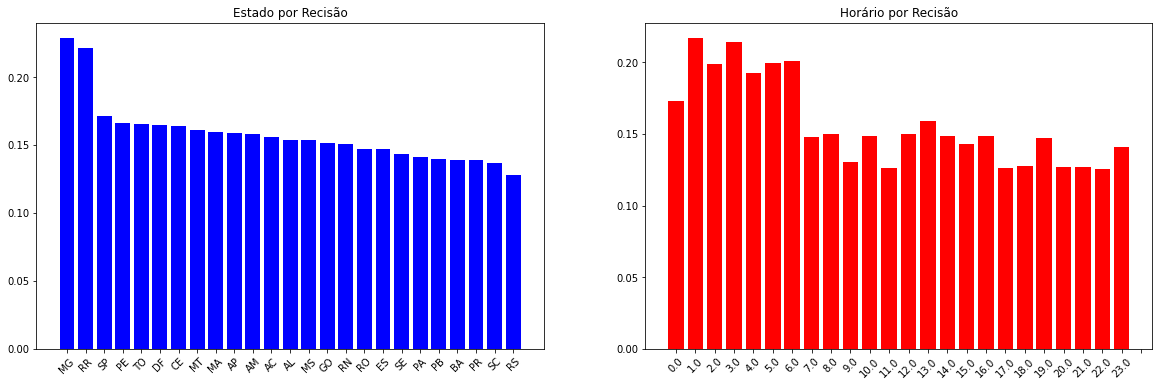

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
g1 = df_clean.groupby('shipping_state').target_default.mean().sort_values(ascending=False)
g2 = df_clean.groupby('application_time_applied').target_default.mean().sort_index()
g3 = df_clean.groupby('external_data_provider_credit_checks_last_month').target_default.mean().sort_values
g4 = df_clean.groupby('external_data_provider_fraud_score').target_default.mean().sort_values

ax[0].bar(g1.index, g1, color='blue')
ax[0].set_xticklabels(g1.index, rotation=45)
ax[0].set_title('Estado por Recisão')

ax[1].bar(g2.index, g2, color='red')
ax[1].set_xticklabels(g2.index, rotation=45)
ax[1].set_xticks(range(0, 25))
ax[1].set_title('Horário por Recisão')

plt.show()

In [18]:
df_clean['night'] = df_clean['application_time_applied'].apply(lambda x: 1 if x <= 6 else 0)

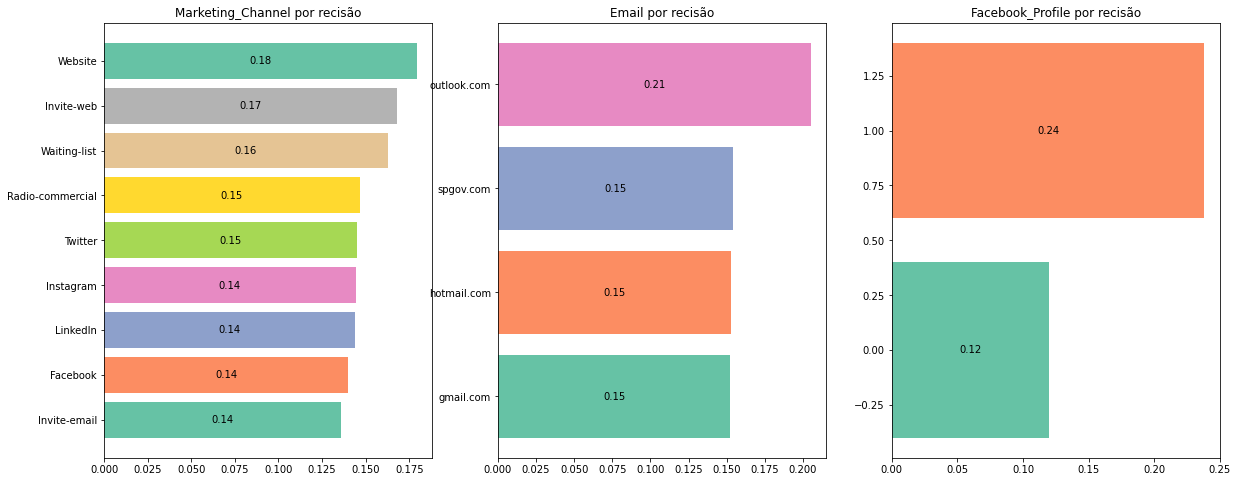

In [19]:
cols = ['marketing_channel', 'email', 'facebook_profile']

fig = plt.figure(figsize=(20,8))
    
for i in range(len(cols)):
    img = df_clean.groupby(cols[i]).target_default.mean().sort_values()
    ax = fig.add_subplot(1, 3, i+1)
    rects = ax.barh(img.index, img, color=sns.color_palette('Set2'))
    ax.set_title(f'{cols[i].title()} por recisão')
    
    for rect in (rects):
        width = rect.get_width()
        ax.text(y=rect.get_y() + rect.get_height() / 2, x=width * 0.5, s=round(width, 2), ha='center', va='center')

plt.show()

Notamos que:
* E-mails `@outlook.com` tem maior probabilidade de inadimplência;
* Aplicações com perfil no `Facebook` têm maior chance de inadimplência;
* Não se pode afirmar muito sobre a coluna `marketing_channel`, mas há uma leve tendência em alguns valores.


Vamos agora realizar análises semelhantes para algumas colunas numéricas. Para tanto, plotaremos gráficos de dispersão.


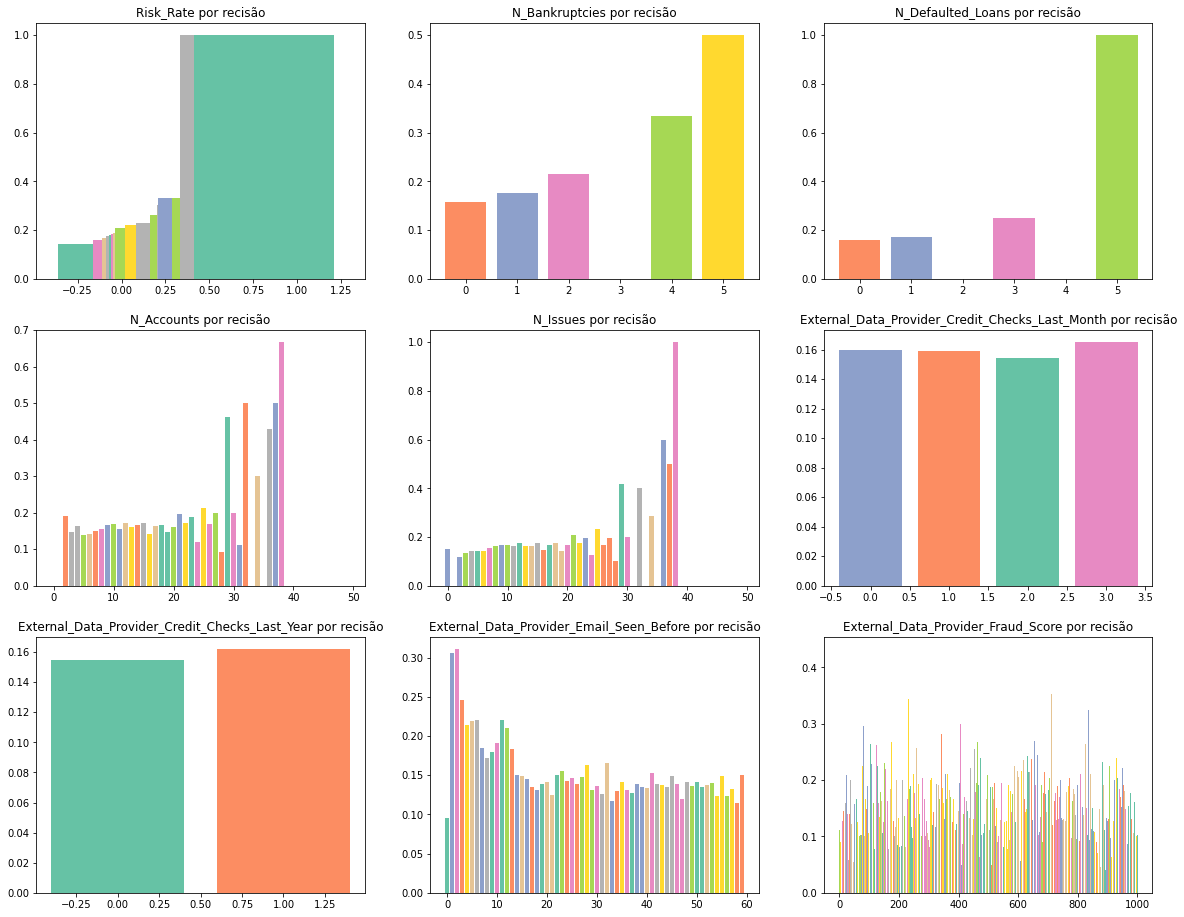

In [20]:
cols = ['risk_rate','n_bankruptcies','n_defaulted_loans','n_accounts','n_issues',
        'external_data_provider_credit_checks_last_month','external_data_provider_credit_checks_last_year','external_data_provider_email_seen_before',
        'external_data_provider_fraud_score']

fig = plt.figure(figsize=(20,16))
for i in range(len(cols)):
    img = df_clean.groupby(cols[i]).target_default.mean().sort_values()
    ax = fig.add_subplot(3, 3, i+1)
    rects = ax.bar(img.index, img, color=sns.color_palette('Set2'))
    ax.set_title(f'{cols[i].title()} por recisão')
    
plt.show()

* `risk_rate` tem praticamente uma relação muito boa com os valores de inadimplência do dataset
* `n_bankruptcies` se mostra uma variável difícil de levar com consideração. Por mais que o gráfico possa inicialmente expressar alguma dinâmica de correlação, a falta de valores não permite tirar uma conclusão sólida, sendo que metade dos valores das variáveis estão presentes em **menos de 0,1%** dos dados.
* `n_defaulted_loans` mostra dados da mesma forma, sendo ainda menos recorrentes os demais valores.

In [21]:
pd.DataFrame(df_clean.n_bankruptcies.value_counts()).join(pd.DataFrame(df_clean.n_defaulted_loans.value_counts())).style.applymap(lambda x: 
                                                                                                                                  'background-color: green' 
                                                                                                                                  if x >= df_clean.shape[0]/1000 
                                                                                                                                  else 'background-color: red')

,n_bankruptcies,n_defaulted_loans
0.0,38621,41576.000000
1.0,3067,144.000000
2.0,42,16.000000
3.0,6,4.000000
4.0,3,nan
5.0,2,1.000000


Podemos visualizar a distribuição da latitude e longitude para podermos entender algum padrão no local recorrente da inadimplência pelas variáveis `lat` e `lon`.

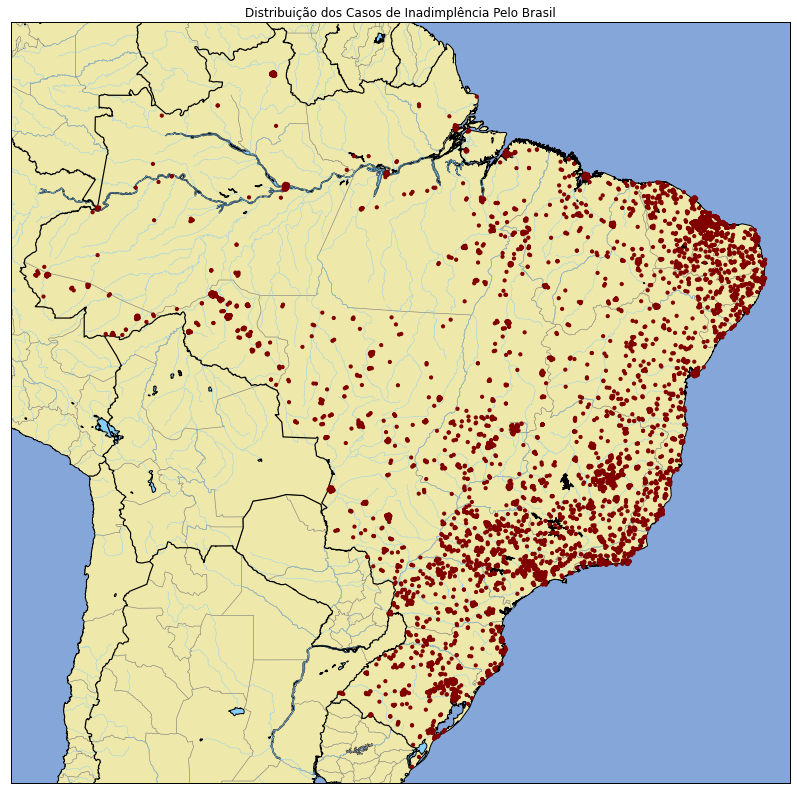

In [22]:
df1 = df_clean[df_clean['target_default'] == 1]

plt.figure(figsize=(16,14))
m = Basemap(projection='cyl', resolution='h', llcrnrlat=-34.5, urcrnrlat=5.57, 
            llcrnrlon=-74.5, urcrnrlon=-33.47)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawstates(color='grey', linewidth=.6)
m.drawrivers(color='lightskyblue', linewidth=.4)
m.drawcountries(color='black', linewidth=1.2)

m.scatter(df1['lon'], df1['lat'], s=10, zorder=2, latlon=True, c=df1['target_default'], cmap=plt.get_cmap('jet_r'))

plt.title('Distribuição dos Casos de Inadimplência Pelo Brasil')
plt.savefig('map.png')
plt.show()

In [23]:
centro_mapa = {'lat':df_clean.lat.mean(), 'lon':df_clean.lon.mean()}
mapa = px.density_mapbox(df_clean, lat='lat', lon='lon',z='target_default', radius=2,
                        center=centro_mapa, zoom=3,
                        mapbox_style='stamen-terrain')
mapa.show()

In [24]:
df_clean.drop(['lat','lon'], axis=1, inplace=True)

A distribuição dos valores está muito dispersa, tornando difícil a utilização dos dados de latitude e longitude como um diferencial. Então iremos remover estes valores da análise.

Em última etapa do processo de *feature engineering*, vamos voltar a trabalhar com a coluna `profile_tags`, transformando cada uma das tags em uma variável *dummie*. Para tanto, vamos seguir os seguintes passos:

* Transformar cada conjunto de *tags* em uma lista;
* Selecionar apenas as *tags* únicas em uma lista;
* Iterar sobre a lista de *tags* únicas e usar uma função `lambda` para criar uma coluna para cada *tag*;
* Descartar a coluna `profile_tags`. 

In [25]:
time_tag = time.time()

unique_tags=[]
for tags in df_clean['profile_tags'].str.split():
  for tag in tags:
    unique_tags.append(tag)

for tag in unique_tags:
  df_clean[tag] = df_clean['profile_tags'].apply(lambda x: 1 if tag in x else 0)
df_clean.drop('profile_tags', axis=1, inplace=True)

print("--- %s seconds ---" % (time.time() - time_tag))

--- 2369.6884853839874 seconds ---


In [26]:
cols = ['score_1', 'score_2', 'real_state']

for col in cols:
    encoder = LabelEncoder().fit(df_clean[col])
    df_clean[col] = encoder.transform(df_clean[col])

col_dummies = cols + ['application_time_applied', 'email', 'marketing_channel', 'shipping_state']

df_clean = pd.get_dummies(df_clean, columns=col_dummies)

df_clean.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,night,n19,n8,n6,n7,nim,n0,n17,da,n4,pro+aty,b19,c1,n3,n9,n15,c55,n14,...,application_time_applied_22.0,application_time_applied_23.0,email_gmail.com,email_hotmail.com,email_outlook.com,email_spgov.com,marketing_channel_Facebook,marketing_channel_Instagram,marketing_channel_Invite-email,marketing_channel_Invite-web,marketing_channel_LinkedIn,marketing_channel_Radio-commercial,marketing_channel_Twitter,marketing_channel_Waiting-list,marketing_channel_Website,shipping_state_AC,shipping_state_AL,shipping_state_AM,shipping_state_AP,shipping_state_BA,shipping_state_CE,shipping_state_DF,shipping_state_ES,shipping_state_GO,shipping_state_MA,shipping_state_MG,shipping_state_MS,shipping_state_MT,shipping_state_PA,shipping_state_PB,shipping_state_PE,shipping_state_PR,shipping_state_RN,shipping_state_RO,shipping_state_RR,shipping_state_RS,shipping_state_SC,shipping_state_SE,shipping_state_SP,shipping_state_TO
0,0.0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,1.0,32.0,0.0,0.0,18.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,0.0,50.0,0.0,0.0,14.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1.0,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,0.0,32.0,0.0,0.0,10.0,0.0,6.0,2.0,1.0,9.0,65.0,163679.0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,0.0,32.0,1.0,0.0,19.0,19.0,406.0,3.0,1.0,38.0,815.0,1086.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25213.0,60011.29,1.0,32.0,0.0,0.0,11.0,0.0,240.0,2.0,1.0,46.0,320.0,198618.0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Por fim, irei separar a variável alvo das demais e dividir o *dataset* entre dados de treino e teste com a função `train_test_split`.

In [27]:
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df_clean.drop('target_default', axis=1)
y = df_clean['target_default']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

Para melhorar o desempenho do modelo, irei normalizar as variáveis numéricas usando `StandardScaler`.

1.0    35080
0.0    35080
Name: target_default, dtype: int64 



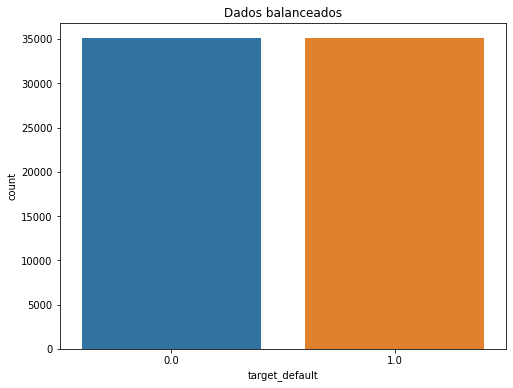

In [28]:
from sklearn.preprocessing import StandardScaler

maioria = df_clean[df_clean['target_default'] == 0]
minoria = df_clean[df_clean['target_default'] == 1]

minoria_balanceada = resample(minoria, replace=True, n_samples=35080)

df_balanceado = pd.concat([maioria, minoria_balanceada])

# Dividindo e padronizando o dataset balanceado
X_balanceado = df_balanceado.drop('target_default', axis=1)
y_balanceado = df_balanceado['target_default']

X_train_balanceado, X_test_balanceado, y_train_balanceado, y_test_balanceado = train_test_split(X_balanceado, y_balanceado)

scaler_balanceado = StandardScaler()
scaler_balanceado.fit(X_train_balanceado)
X_train_balanceado = scaler_balanceado.transform(X_train_balanceado)
X_test_balanceado = scaler_balanceado.transform(X_test_balanceado)

# Verificando o balanceamento
print(df_balanceado['target_default'].value_counts(), '\n')

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df_balanceado['target_default'])
ax.set_title('Dados balanceados')
plt.show()

## Construção do Modelo

Arbitrariamente, escolhi o XGBoost para a construção do modelo, uma vez que este vem se destacando e apresentando bons resultados em problemas similares a este.

Não foi realizada uma análise mais aprofundada sobre as variáveis e nem um *tunning* de parâmetros, mas construído um modelo simples para servir de *baseline*. Ressalta-se que os valores dos parâmetros do XGBoost também foram generalistas e arbitrários.

Pode-se assumir a premissa de que este é um problema multiobjetivo de otimização, onde espera-se minimizar tanto a quantidade de *false positives* quanto maximizar a quantidade de *true positives*.

Para esta etapa inicial, a utilizacão da métrica acurácia pode ser estabelecida a fim de comparação entre diferentes modelos de *Machine Learning* (ou estabelecer um *benchmark*).

Como ação futura, recomenda-se a utilização de *Problem Structuring Methods* para definir pesos para cada objetivo individual a fim de estabelecer uma função objetivo para a modelagem.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [30]:
time_tag = time.time()

# Criando os modelos utilizando validação cruzada
logreg_balanceado  = cross_validate(LogisticRegression(solver='liblinear'), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
logreg = cross_validate(LogisticRegression(solver='liblinear'), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

trees_balanceado  = cross_validate(DecisionTreeClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
trees = cross_validate(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

forest_balanceado  = cross_validate(RandomForestClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
forest = cross_validate(RandomForestClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

xgb_balanceado  = cross_validate(XGBClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
xgb = cross_validate(XGBClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

# Gerando um DataFrame com os resultados de cada modelo
summary = pd.DataFrame({
            'labels': ['accuracy', 'precision', 'recall', 'roc_auc'],
            'logreg_balanceado': [logreg_balanceado['test_accuracy'].mean(), logreg_balanceado['test_precision'].mean(), logreg_balanceado['test_recall'].mean(), logreg_balanceado['test_roc_auc'].mean()],
            'logreg': [logreg['test_accuracy'].mean(), logreg['test_precision'].mean(), logreg['test_recall'].mean(), logreg['test_roc_auc'].mean()],
            'trees_balanceado': [trees_balanceado['test_accuracy'].mean(), trees_balanceado['test_precision'].mean(), trees_balanceado['test_recall'].mean(), trees_balanceado['test_roc_auc'].mean()],
            'trees': [trees['test_accuracy'].mean(), trees['test_precision'].mean(), trees['test_recall'].mean(), trees['test_roc_auc'].mean()],
            'forest_balanceado': [forest_balanceado['test_accuracy'].mean(), forest_balanceado['test_precision'].mean(), forest_balanceado['test_recall'].mean(), forest_balanceado['test_roc_auc'].mean()],
            'forest': [forest['test_accuracy'].mean(), forest['test_precision'].mean(), forest['test_recall'].mean(), forest['test_roc_auc'].mean()],
            'xgb_balanceado': [xgb_balanceado['test_accuracy'].mean(), xgb_balanceado['test_precision'].mean(), xgb_balanceado['test_recall'].mean(), xgb_balanceado['test_roc_auc'].mean()],
            'xgb': [xgb['test_accuracy'].mean(), xgb['test_precision'].mean(), xgb['test_recall'].mean(), xgb['test_roc_auc'].mean()]           
}).set_index('labels')
summary.index.name=None
summary = summary.transpose()    
print("--- %s seconds ---" % (time.time() - time_tag))
summary.style.applymap(lambda x: 'background-color: green' if x >= 0.75 else '')

--- 250.85231280326843 seconds ---


,accuracy,precision,recall,roc_auc
logreg_balanceado,0.668491,0.668248,0.670868,0.727739
logreg,0.838237,0.000000,0.000000,0.499713
trees_balanceado,0.878468,0.819371,0.971491,0.878356
trees,0.741287,0.229216,0.253552,0.544481
forest_balanceado,0.959065,0.952089,0.966897,0.987751
forest,0.838524,0.566558,0.008491,0.704007
xgb_balanceado,0.680103,0.680971,0.679182,0.746104
xgb,0.840856,0.609215,0.044629,0.727583


De uma forma geral, os dados balanceados apresentaram melhores resultados considerando as quatro métricas utilizadas. Dentre os algoritmos, *Random Forests* apresentou os melhores resultados e, portanto, a combinação desse modelo com os dados balanceados é a escolhida para o projeto.

### ***Tunning* de Hiperparâmetros**

Para realizar um ajuste fino no modelo, nas próximas células de código vamos utilizar a técnica de [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para escolher o melhor valor para os seguintes hiperparâmetros:

* *criterion*;
* *n_estimators*;
* *max_depth*;
* *min_samples_split*;
* min_samples_leaf.

In [31]:
time_tag = time.time()

kfold = StratifiedKFold(n_splits=5, shuffle=True)

forest = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy']}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')
best_criterion = result.best_params_['criterion']

print("--- %s seconds ---" % (time.time() - time_tag))

Melhor resultado: 0.9887182066113944 para {'criterion': 'gini'}
--- 172.3522264957428 seconds ---


In [32]:
time_tag = time.time()

forest = RandomForestClassifier(criterion=best_criterion)

param_grid = {'n_estimators': range(50, 500, 50)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')
best_n_estimator = result.best_params_['n_estimators']

print("--- %s seconds ---" % (time.time() - time_tag))

Melhor resultado: 0.9888614172248721 para {'n_estimators': 350}
--- 1611.2698197364807 seconds ---


In [33]:
time_tag = time.time()

forest = RandomForestClassifier(criterion=best_criterion, n_estimators=best_n_estimator)

param_grid = {'max_depth': [range(1, 10), None]}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')
best_max_depth = result.best_params_['max_depth']

print("--- %s seconds ---" % (time.time() - time_tag))

Melhor resultado: 0.9881520099587238 para {'max_depth': None}
--- 306.012592792511 seconds ---


In [34]:
time_tag = time.time()

forest = RandomForestClassifier(criterion=best_criterion, n_estimators=best_n_estimator, max_depth=best_max_depth)

param_grid = {'min_samples_split': range(2, 10, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')
best_min_samples_split = result.best_params_['min_samples_split']

print("--- %s seconds ---" % (time.time() - time_tag))

Melhor resultado: 0.9886769692237587 para {'min_samples_split': 2}
--- 1007.2067177295685 seconds ---


In [35]:
time_tag = time.time()

forest = RandomForestClassifier(criterion=best_criterion, n_estimators=best_n_estimator, max_depth=best_max_depth, min_samples_split=best_min_samples_split)

param_grid = {'min_samples_leaf': range(1, 6, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')
best_min_samples_leaf = result.best_params_['min_samples_leaf']

print("--- %s seconds ---" % (time.time() - time_tag))

Melhor resultado: 0.9866416916031658 para {'min_samples_leaf': 1}
--- 753.1093516349792 seconds ---


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8802
         1.0       0.98      0.98      0.98      8738

    accuracy                           0.98     17540
   macro avg       0.98      0.98      0.98     17540
weighted avg       0.98      0.98      0.98     17540

ROC_AUC Score: 0.9780592401620786 



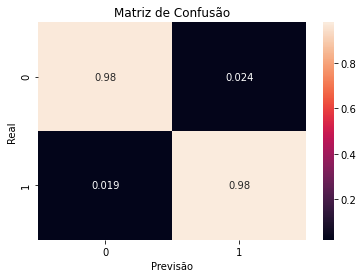

In [36]:
modelo = RandomForestClassifier(criterion=best_criterion, n_estimators=best_n_estimator, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
modelo.fit(X_train_balanceado, y_train_balanceado)

y_pred = modelo.predict(X_test_balanceado)

print(classification_report(y_test_balanceado, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_test_balanceado, y_pred)}', '\n')

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test_balanceado, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Matriz de Confusão')
ax.set_ylabel('Real')
ax.set_xlabel('Previsão')
plt.show()

In [37]:
# Tempo de execução total do programa
print("--- %s seconds ---" % (time.time() - start_time))

--- 6615.225593090057 seconds ---
